## Lec 1. Intro

- DNN101 (Deep Neural Network)
- Artificial Intelligence `人工智能`
    - 专家系统
    - Machine Learning `机器学习` (scikit-learning)
        - 线性回归, 逻辑回归
        - 朴素贝叶斯
        - 决策树
        - 集成模型: 随机森林, XGBoosting, LightGBM, .......
        - 多层感知机 MLP (神经网络)
            - Deep Learning `深度学习`
---
- 机器学习模型分类
    - 有监督学习
        - Regression 回归模型
        - Classification 分类模型
        - Generative 生成式模型
    - 无监督学习
        - Clustering 聚类模型
        - Reinforcement Learning 强化学习
- 常见算法领域
    - Computer Vision 计算机视觉
    - Nature Language Processing 自然语言处理
    - Recommendation System 推荐系统
    - Reinforcement Learning 强化学习
    - .......
- 深度学习常用框架
    - tensorflow
    - **pytorch**
    - mxnet
    - paddle
---
### 1.1 课程计划
- Linear Neural Network
- CNN
- (Diffusion)
- RNN
- Transformer

### 1.2 Linear Regression 线性回归 & Linear Neural Network 线性神经网络

`f(x) = x*weight + bias`

In [1]:
import torch
import numpy as np

In [2]:
def linear_regression(x: float) -> float:
    """ 线性回归函数 """
    weight = 5
    bias = 2
    return x * weight + bias

In [5]:
linear_regression(3)

17

In [7]:
[1, 2, 3]  # 列表
np.array([1, 2, 3])  # 向量
torch.tensor([1, 2, 3])  # 张量

tensor([1, 2, 3])

In [9]:
torch.matmul(torch.rand(2, 3), torch.rand(3, 5))

tensor([[1.3152, 0.6238, 0.2913, 0.7146, 1.0038],
        [1.7549, 0.9517, 0.4323, 0.9960, 1.3141]])

In [11]:
torch.rand(2, 3) @ torch.rand(3, 5) 

tensor([[1.1148, 1.4050, 0.8204, 1.3057, 0.8682],
        [1.0493, 1.5238, 1.1239, 1.5164, 1.0002]])

In [13]:
x = torch.rand(2, 3)
x

tensor([[0.4898, 0.9592, 0.3476],
        [0.0906, 0.1033, 0.8779]])

In [15]:
torch.nn.Parameter(x)

Parameter containing:
tensor([[0.4898, 0.9592, 0.3476],
        [0.0906, 0.1033, 0.8779]], requires_grad=True)

In [17]:
def linear_neural_network(x: torch.tensor) -> torch.tensor:
    """ 线性神经网络运算函数 """
    weight = torch.nn.Parameter(torch.rand(3, 5))
    bias = torch.nn.Parameter(torch.rand(5))
    return x @ weight + bias

In [19]:
linear_regression(torch.rand(2, 3))

tensor([[6.0598, 2.6760, 3.8940],
        [6.9256, 2.6428, 5.3854]])

In [21]:
class Linear(torch.nn.Module):
    """ 线性神经网络 """
    def __init__(self, in_features, out_features):
        super().__init__()
        self.weight = torch.nn.Parameter(torch.rand(in_features, out_features))
        self.bias = torch.nn.Parameter(torch.rand(out_features))
        
    def forward(self, x):
        return x @ self.weight + self.bias

In [23]:
x = torch.rand(3, 3)

In [37]:
model = Linear(3, 5)
output = model(x)
output

tensor([[1.0895, 1.5341, 1.8433, 1.0068, 0.5544],
        [0.5773, 1.1435, 1.2999, 0.7613, 0.2236],
        [0.9617, 1.1965, 1.4191, 0.6346, 0.4476]], grad_fn=<AddBackward0>)

In [39]:
model.weight, model.bias

(Parameter containing:
 tensor([[0.9009, 0.1474, 0.5372, 0.0276, 0.6027],
         [0.1319, 0.2378, 0.6716, 0.7103, 0.2194],
         [0.6338, 0.8008, 0.5403, 0.0572, 0.2729]], requires_grad=True),
 Parameter containing:
 tensor([0.2025, 0.6693, 0.8108, 0.5105, 0.0068], requires_grad=True))

### 1.3 逻辑回归模型

In [41]:
import torch.nn.functional as F

class LogisticRegression(torch.nn.Module):
    """ 逻辑回归模型 """
    def __init__(self):
        super().__init__()
        self.fc = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        """ 前向传播 """
        return F.sigmoid(self.fc(x))

In [43]:
# 生成数据集 dataset
x = torch.Tensor([[1.0], [2.0], [3.0]])
y = torch.Tensor([[0], [0], [1]])

In [45]:
model = LogisticRegression()
loss_func = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

In [47]:
total_loss = []
for i in range(5000):
    # forward
    y_hat = model(x)
    loss = loss_func(y_hat, y)
    
    # backward
    optimizer.zero_grad()
    loss.backward()
    
    # update
    optimizer.step()
    total_loss.append(loss.item())

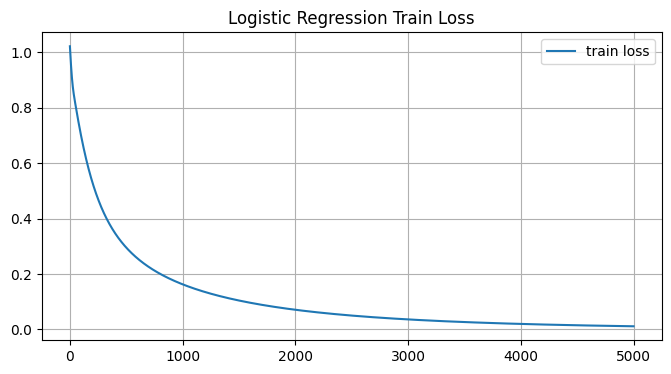

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(total_loss, label="train loss")
plt.title("Logistic Regression Train Loss")
plt.legend()
plt.grid()
plt.show()

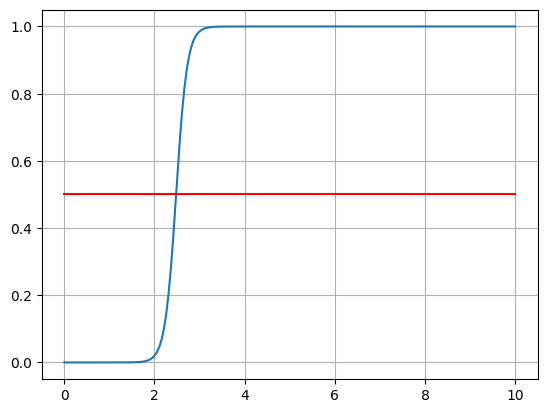

In [51]:
x_t = torch.Tensor(np.linspace(0, 10, 200)).view(200, 1) #生成一个长度为200的Numpy数组数值均匀分布在[0,10]区间内，将张量调整为200行1列
y_hat = model(x_t)

plt.plot(x_t.data.numpy(), y_hat.data.numpy())
plt.plot([0, 10], [0.5, 0.5], c='r')
plt.grid()